In [1]:
!pip install numpy matplotlib scipy

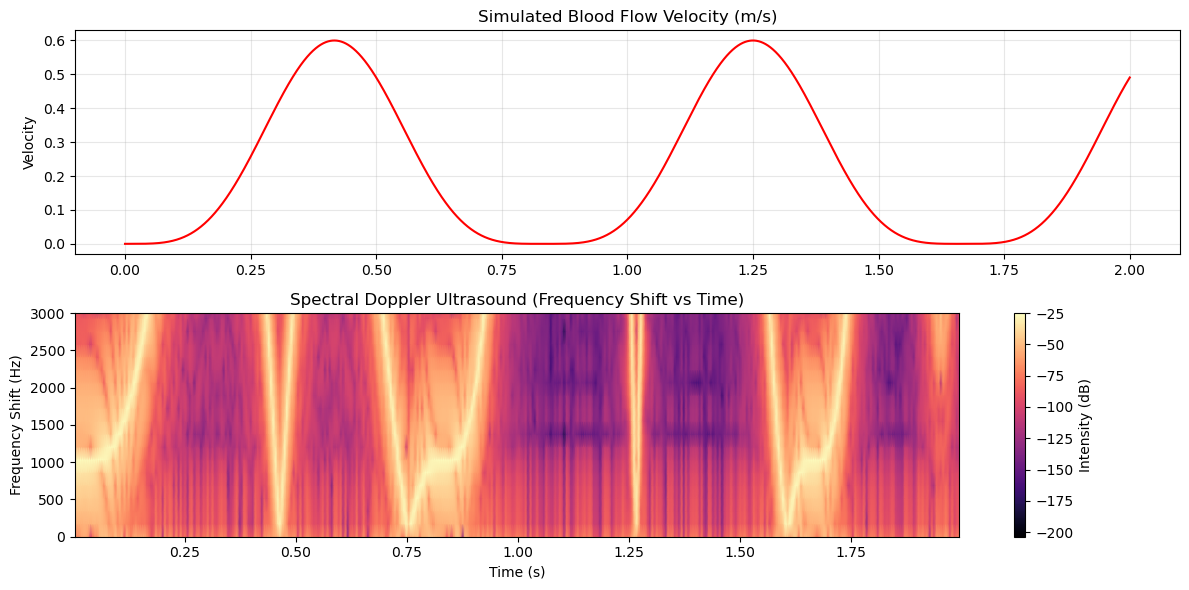

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulation Parameters
fs = 44100          # Audio-range sampling for the Doppler shift (Hz)
f0 = 5e6            # 5 MHz Ultrasound carrier frequency
c = 1540            # Speed of sound in tissue (m/s)
duration = 2.0      # 2 seconds of heartbeats
t = np.linspace(0, duration, int(fs * duration))

# 2. Simulate Pulsatile Blood Velocity (v)
# A heartbeat has a sharp systolic peak and a slower diastolic flow
heart_rate = 1.2    # Hz (about 72 BPM)
v_max = 0.6         # 0.6 m/s peak velocity
velocity = v_max * (np.sin(np.pi * heart_rate * t)**4) # Pulsing effect

# 3. Calculate Doppler Shift Frequency (delta_f)
# We assume a 0-degree angle for maximum shift
delta_f = (2 * f0 * velocity) / c

# 4. Generate the "Color Doppler" Data
# In real machines, we use a Short-Time Fourier Transform (STFT)
from scipy.signal import spectrogram
# We create a signal that actually shifts in frequency
carrier_shift = np.sin(2 * np.pi * (1000 + delta_f) * t) 

f, ts, Sxx = spectrogram(carrier_shift, fs, nperseg=256)

# 5. Visualization
plt.figure(figsize=(12, 6))

# Top Plot: Velocity over time
plt.subplot(2, 1, 1)
plt.plot(t, velocity, color='red')
plt.title("Simulated Blood Flow Velocity (m/s)")
plt.ylabel("Velocity")
plt.grid(True, alpha=0.3)

# Bottom Plot: Spectral Doppler (Spectrogram)
plt.subplot(2, 1, 2)
plt.pcolormesh(ts, f, 10 * np.log10(Sxx), shading='gouraud', cmap='magma')
plt.title("Spectral Doppler Ultrasound (Frequency Shift vs Time)")
plt.ylabel("Frequency Shift (Hz)")
plt.xlabel("Time (s)")
plt.ylim(0, 3000) # Focusing on the shift range
plt.colorbar(label='Intensity (dB)')

plt.tight_layout()
plt.show()